In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
import matplotlib.pyplot as plt
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

In [ ]:
# corr_path='/content/drive/MyDrive/Data/Corroded'
# noncorr_path='/content/drive/MyDrive/Data/Non Corroded'

In [ ]:
# test_ds= tf.keras.utils.image_dataset_from_directory(
#   '/content/drive/MyDrive/Data',
#   label_mode='int',
#   seed=123,
#   image_size=(256, 256),
#   validation_split=0.2,
#   subset='validation',
#   batch_size=100)
# train_ds= tf.keras.utils.image_dataset_from_directory(
#   '/content/drive/MyDrive/Data',
#   label_mode='int',
#   seed=123,
#   image_size=(256, 256),
#   validation_split=0.2,
#   subset='training',
#   batch_size=100)

In [ ]:
# train_ds

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='ReLU',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation='ReLU',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),activation='ReLU',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),activation='ReLU',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="ReLU"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# history = model.fit(train_ds,epochs=20,validation_data=test_ds)

In [ ]:
datagen=ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    shear_range=0.2,
    validation_split=0.2
)

In [ ]:
train_ds=datagen.flow_from_directory(
        '/content/drive/MyDrive/Data',
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary',
        subset='training')
test_ds=datagen.flow_from_directory(
        '/content/drive/MyDrive/Data',
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary',
        subset='validation'
        )

Found 999 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


In [ ]:
model.fit(train_ds,steps_per_epoch=999//32,epochs=20,validation_data=test_ds)

Epoch 1/20
31/31 [==============================] - 657s 21s/step - loss: 0.7215 - accuracy: 0.6256 - val_loss: 0.6563 - val_accuracy: 0.6492
Epoch 2/20
31/31 [==============================] - 57s 2s/step - loss: 0.6506 - accuracy: 0.6246 - val_loss: 0.6770 - val_accuracy: 0.6492
Epoch 3/20
31/31 [==============================] - 76s 3s/step - loss: 0.6285 - accuracy: 0.6722 - val_loss: 0.6837 - val_accuracy: 0.6452
Epoch 4/20
31/31 [==============================] - 58s 2s/step - loss: 0.6135 - accuracy: 0.6744 - val_loss: 0.6771 - val_accuracy: 0.6452
Epoch 5/20
31/31 [==============================] - 57s 2s/step - loss: 0.5480 - accuracy: 0.7107 - val_loss: 0.6328 - val_accuracy: 0.6210
Epoch 6/20
31/31 [==============================] - 57s 2s/step - loss: 0.5209 - accuracy: 0.7735 - val_loss: 0.5921 - val_accuracy: 0.6734
Epoch 7/20
31/31 [==============================] - 57s 2s/step - loss: 0.4588 - accuracy: 0.8004 - val_loss: 0.8820 - val_accuracy: 0.6331
Epoch 8/20
31/31 [

In [ ]:
def predict(path):
  img=keras.utils.load_img(
    path,
    grayscale=False,
    color_mode="rgb",
    target_size=(256,256),
    interpolation="nearest",
    keep_aspect_ratio=False,
  )
  img1=np.asarray(img)
  img1=np.reshape(img1,(1,256,256,3))
  if pro.predict(img1)<0.5:
    print("Corroded")
  else:
    print("Non Corroded")

  print(pro.predict(img1))
  return img

  



1/1 [==============================] - 0s 321ms/step
Non Corroded
1/1 [==============================] - 0s 21ms/step
[[1.]]


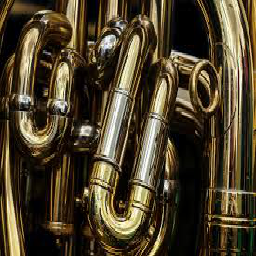

In [ ]:
path='/content/drive/MyDrive/Data/NonCorroded/127.png'
predict(path)

1/1 [==============================] - 0s 21ms/step
Corroded
1/1 [==============================] - 0s 20ms/step
[[0.]]


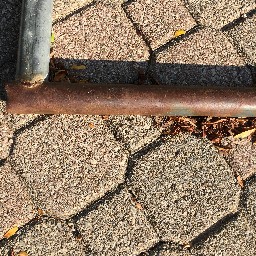

In [ ]:
path='/content/drive/MyDrive/Data/Corroded/107.png'
predict(path)

1/1 [==============================] - 0s 26ms/step
Non Corroded
1/1 [==============================] - 0s 20ms/step
[[1.]]


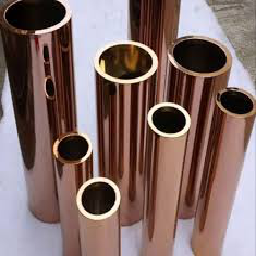

In [ ]:
path='/content/drive/MyDrive/validationData/213.png'
predict(path)

In [ ]:
save_model(model, "model.h5")

In [ ]:
pro=load_model('model.h5')